In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 1

In [20]:
df = pd.DataFrame(np.array([
    [80,70,60,50,40,30],
    [80,70,60,49.5,39.5,29.5],
    [80.5,70,60,50,40,30.5],
    [80,70,59.5,49.5,39.0,29.5]
]).T)
df = df.set_index(0)
df["mean"] = df.mean(axis=1)
df["std err"] = np.maximum(df.std(axis=1)/np.sqrt(df.shape[1]), 0.1)
df

,1,2,3,mean,std err
0,,,,,
80.0,80.0,80.5,80.0,80.166667,0.117851
70.0,70.0,70.0,70.0,70.000000,0.100000
60.0,60.0,60.0,59.5,59.833333,0.117851
50.0,49.5,50.0,49.5,49.666667,0.117851
40.0,39.5,40.0,39.0,39.500000,0.204124
30.0,29.5,30.5,29.5,29.833333,0.235702


Text(0.5, 1.0, 'Incident angle vs. Output angle')

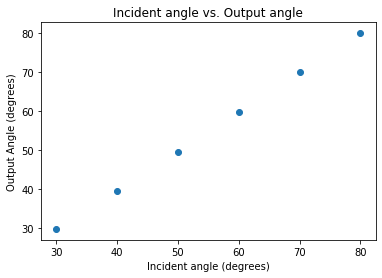

In [29]:
plt.plot(df.index, df["mean"], "o")
plt.errorbar(df.index, df["mean"], yerr=df["std err"], fmt="none")
plt.xlabel("Incident angle (degrees)")
plt.ylabel("Output Angle (degrees)")
plt.title("Incident angle vs. Output angle")

In [41]:
lr = LinearRegression(fit_intercept=False)
lr.fit(df.index.values.reshape(-1, 1), df[["mean"]])
lr.coef_

array([[0.9980737]])

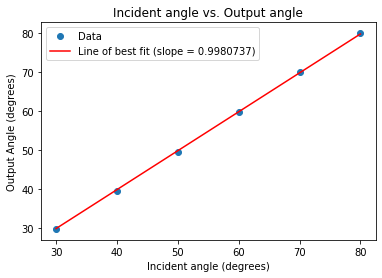

In [46]:
plt.plot(df.index, df["mean"], "o", label="Data")
plt.errorbar(df.index, df["mean"], yerr=df["std err"], fmt="none")
plt.xlabel("Incident angle (degrees)")
plt.ylabel("Output Angle (degrees)")
plt.title("Incident angle vs. Output angle")
plt.plot(df.index, lr.coef_[0]*df.index, "r", label="Line of best fit (slope = 0.9980737)")
plt.legend();

In [47]:
from scipy.stats import chisquare

In [49]:
chisquare(f_obs=df["mean"], f_exp=df.index)

Power_divergenceResult(statistic=0.010208333333333385, pvalue=0.9999994419760996)

# 2.2

In [53]:
df2 = pd.DataFrame(np.array([[46.5,
11,
23,
56.5,
71,
64,
37.5],
[2.2,
0.4,
1.1,
2.5,
3.1,
2.8,
1.7],
[2.1,
0.5,
1.1,
2.5,
3.1,
2.9,
1.7]]).T)
df2 = df2.set_index(0)
df2["mean"] = df2.mean(axis=1)
df2["std err"] = np.maximum(df2.std(axis=1)/np.sqrt(df2.shape[1]), 0.1)
df2

,1,2,mean,std err
0,,,,
46.5,2.2,2.1,2.15,0.1
11.0,0.4,0.5,0.45,0.1
23.0,1.1,1.1,1.10,0.1
56.5,2.5,2.5,2.50,0.1
71.0,3.1,3.1,3.10,0.1
64.0,2.8,2.9,2.85,0.1
37.5,1.7,1.7,1.70,0.1


In [60]:
def n_brick(t, y, theta):
    return (np.sqrt(y**2 + 4*t**2) / y) * np.sin(theta * np.pi / 180)

t = 1.8

In [82]:
df2["n_brick"] = n_brick(t, df2["mean"], df2.index)
df2

,1,2,mean,std err,n_brick
0,,,,,
46.5,2.2,2.1,2.15,0.1,1.414699
11.0,0.4,0.5,0.45,0.1,1.538351
23.0,1.1,1.1,1.10,0.1,1.337120
56.5,2.5,2.5,2.50,0.1,1.461942
71.0,3.1,3.1,3.10,0.1,1.449019
64.0,2.8,2.9,2.85,0.1,1.448026
37.5,1.7,1.7,1.70,0.1,1.425650


In [69]:
def n_err(t, y, theta, delta):
    z = y / np.sqrt(y**2 + 4*t**2)
    return np.sqrt(((np.cos(theta * np.pi / 180) * delta * theta) / z)**2 + ((4*t*np.sin(theta * np.pi / 180) * z)/y**3)**2 * ((t * delta * y)**2 + (y + delta * t)**2))

In [86]:
df2["n_brick_err"] = n_err(t, df2["mean"], df2.index, df2["std err"]) / n_brick(t, df2["mean"], df2.index) * 0.05
df2[["n_brick", "n_brick_err"]]

,n_brick,n_brick_err
theta,,
46.5,1.414699,0.221778
11.0,1.538351,0.285572
23.0,1.337120,0.272570
56.5,1.461942,0.188089
71.0,1.449019,0.123429
64.0,1.448026,0.157157
37.5,1.425650,0.245676


In [87]:
np.mean(df2["n_brick"])

1.439258198831299

In [88]:
np.std(df2["n_brick"])

0.05571202396735119

In [90]:
from scipy.stats import sem
sem(df2["n_brick"])

0.022744338542952887

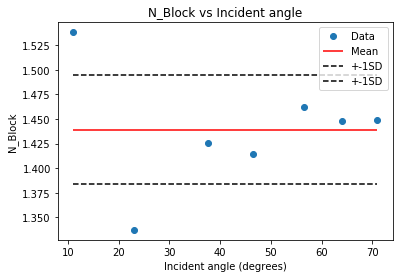

In [103]:
plt.plot(df2.index, df2["n_brick"], "o", label="Data")
plt.xlabel("Incident angle (degrees)")
plt.ylabel("N_Block")
plt.title("N_Block vs Incident angle")
plt.hlines(np.mean(df2["n_brick"]), min(df2.index), max(df2.index), label="Mean", color="r")
# horizontal lines at +/- 1 standard deviation
plt.hlines(np.mean(df2["n_brick"]) + np.std(df2["n_brick"]), min(df2.index), max(df2.index), label="+-1SD", color="black", linestyle="--")
plt.hlines(np.mean(df2["n_brick"]) - np.std(df2["n_brick"]), min(df2.index), max(df2.index), label="+-1SD", color="black", linestyle="--")

plt.legend();